# Project: Investigate a Dataset 
## Gapminder: Examining Trends in Democracy, GDP, HDI and Urban Population

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **A little bit about Gapminder**: Gapminder has collected a lot of information about how people live their lives in different countries, tracked across the years, on a number of different indicators. In this project, I'll take a look at four of these indicators and perform a Data Analysis Process (DAP) on them to see what insights we can gather.

> **A little bit about what we'll be investigating**: For each of the indicators, we'll essentially be looking at them across four decades by extracting data from 1980, 1990, 2000, and 2010/2011. That way we can look at trends over time in a digestible way.

   > **Indicator 1**: Democracy Score (-10 is low, 10 is high)
   
   > This score is based on Polity IV, which is calculated by subtracting an autocracy score from a democracy score. It's a summary measure of a country's democratic and free nature. Anarchy, periods when normal government is suspended are coded as 0.
   
   > There as been some interpolation for instances of foreign interruption, dissolved or merged countries, etc.
   
   > **Indicator 2**: GDP per Capita
   
   > This is in constant 2000 USD. The inflaction but not the difference in cost of living between countries has been taken into account.
   
   > **Indicator 3**: Human Development Index - HDI (0 is low, 1 is high)
   
   > This is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and having a decent standard of living. This is calculated by taking the geometric mean of normalized indices for each of the three dimensions (life expectancy index, Education index, GNI index).
   
   > **Indicator 4**: Urban Population (as a percentage of total population)

> **Questions to investigate**: 

>Does there appear to be a relationship between more Democratic countries and GDP, HDI, or Urban Population? That said, do we need to first see if countries are overall becoming more democratic with time?

>Does there appear to be a relationship between urban population and HDI trends?

>Does there appear to be a relationship between GDP and HDI trends?

In [1]:
# set up import statements for all of the packages we plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> This is where we load in the data, check for cleanliness, and then trim and clean our dataset for analysis.

### General Properties

### Data Cleaning

> We have four indicators we are examining from Gapminder, and each of them came as a separate dataset. This means we will have to load each dataset as a csv file and merge all four into one master data set. 

> We will have make some adjustments to each individual dataset before we do the merge in order to have complete data from the years we are examining, and that we can identify each variable as a distinguished column in the final dataset.

> Over the next four cells, we will import the dataframes, extract just the columns/years we need, and add a suffix to each column name identifying the indicator.

In [2]:
#import democracy scores csv, create new dataframe with just values from 1980, 1990, 2000, and 2010, 
# and add '_dem' to column names
dem_scores = pd.read_csv('Democracy_Score.csv', index_col=0)
dem_scores = dem_scores[['1980','1990','2000','2010']]
dem_scores = dem_scores.rename(columns=lambda x: x+'_dem')

In [3]:
#import GDP csv, create new dataframe with just values from 1980, 1990, 2000, and 2010, 
# and add '_GDP' to column names
GDP = pd.read_csv('GDPpercapita.csv', index_col=0)
GDP = GDP[['1980','1990','2000','2010']]
GDP = GDP.rename(columns=lambda x: x+'_GDP')

In [4]:
#import HDI csv, create new dataframe with just values from 1980, 1990, 2000, and 2011, 
# and add '_HDI' to column names
HDI = pd.read_csv('Indicator_HDI.csv', index_col=0)
HDI = HDI[['1980','1990','2000','2011']]
HDI = HDI.rename(columns=lambda x: x+'_HDI')

In [5]:
#import urban population csv, create new dataframe with just values from 1980, 1990, 2000, and 2010, 
# and add '_urban' to column names
urban_pop = pd.read_csv('Urban_Population.csv', index_col=0)
urban_pop = urban_pop[['1980','1990','2000','2010']]
urban_pop = urban_pop.rename(columns=lambda x: x+'_urban')

> We have a bit of missing data, as per usual. Because we're unable to do anything with countries for which we were given no data at all for any of the years we are examining, we will need to drop those countries from the examination.

> Over the next five cells, we will drop rows in which ALL values are NaN, name the index column 'Country' and fill any remaining NaN cells with values that are appropriate for the respective indicator data. Then we will verify that there are no more NaNs remaining in the dataset. Throughout the process, I will refer to the NaN and null interchangeably to indicate cells with no values.

In [6]:
def del_nulls(dataframe):
    """function that drops rows in which ALL values are null for a dataframe,
       labels index column as Country"""
    dataframe = dataframe.dropna(axis=0, how='all', inplace = False)
    dataframe.index.name = 'Country'
    return dataframe

In [7]:
#drop rows with all nulls from each dataframe over the next four cells,
#using the function described above.
dem_scores = del_nulls(dem_scores)

#fill all remaining null values with either 0, or a value that makes sense for each data frame over the next four cells

#fill Bosnia and Herzegovina NaN scores with -4 as that is the estimated score for those years
dem_scores.loc[('Bosnia and Herzegovina', '2000_dem')]=-4
dem_scores.loc[('Bosnia and Herzegovina', '2010_dem')]=-4

#fill remaining NaNs with 0, to indicate anarchy, dissolved country, etc.
for column in dem_scores:
    dem_scores[column] = dem_scores[column].fillna(0)

#confirm there are no more null values in dataframe
dem_scores.isnull().sum().sum()

0

In [8]:
#drop rows with all nulls
GDP = del_nulls(GDP)

#fill remaining NaNs with mean GDP for that country
GDP_mean = GDP.mean(axis=1)
for i, col in enumerate(GDP):
    GDP.iloc[:, i] = GDP.iloc[:, i].fillna(GDP_mean)

GDP.isnull().sum().sum()

0

In [9]:
#drop rows with all nulls
HDI = del_nulls(HDI)

#fill remaining NaNs with mean HDI for that country
HDI_mean = HDI.mean(axis=1)
for i, col in enumerate(HDI):
    HDI.iloc[:, i] = HDI.iloc[:, i].fillna(HDI_mean)
    
print(HDI.isnull().sum().sum())

0


In [10]:
#drop rows with all nulls
urban_pop = del_nulls(urban_pop)

#urban_pop luckily had no remaining NaNs to fill, so all data is there! (for our purposes)
print(urban_pop.isnull().sum().sum())

0


> Now we have to merge all four datasets together into one final, master dataset that displays each country and its value for each indicator, for each year. We will do this so that it is sorted in a way shows all indicators grouped by year, in ascending order.

In [11]:
#merge dem_score and GDP dataframes, keeping only rows that are matching in country name/left index and name dem_GDP
dem_GDP = pd.merge(dem_scores, GDP, left_index=True, right_index=True)

#merge dem_GDP with HDI, keeping only rows that are matching in country name/left index and name dem_GDP_HDI
dem_GDP_HDI = pd.merge(dem_GDP, HDI, left_index=True, right_index=True)

#Create final merged dataframe with all four indicators: Democracy Score, GDP, HDI Score, and Urban Population %
#merge dem_GDP_HDI with urban_pop, keeping only rows that are matching in country name/left index and name dem_GDP_HDI_urb
dem_GDP_HDI_urb = pd.merge(dem_GDP_HDI, urban_pop, left_index=True, right_index=True)

In [12]:
#rearrange columns so that the indicator values for each year are next to each other
dem_GDP_HDI_urb.sort_index(axis=1, inplace=True)

#verify that there are no nulls
print(dem_GDP_HDI_urb.isnull().sum().sum())

#display first five rows of final merged dataset
dem_GDP_HDI_urb.head()

0


,1980_GDP,1980_HDI,1980_dem,1980_urban,1990_GDP,1990_HDI,1990_dem,1990_urban,2000_GDP,2000_HDI,2000_dem,2000_urban,2010_GDP,2010_dem,2010_urban,2011_HDI
Country,,,,,,,,,,,,,,,,
Albania,1060.684602,0.695333,-9.0,33.762,977.765530,0.6560,1.0,36.428,1200.137437,0.691,5.0,41.741,1915.424459,9.0,52.322,0.739
Algeria,1876.075639,0.454000,-9.0,43.542,1832.743369,0.5510,-2.0,52.085,1794.405233,0.624,-3.0,60.787,2231.980246,2.0,72.024,0.698
Angola,431.481877,0.435000,-7.0,24.298,372.794513,0.4350,-7.0,37.144,298.405843,0.384,-3.0,48.987,623.245275,-2.0,58.379,0.486
Argentina,7540.685263,0.669000,-9.0,82.887,5581.962341,0.6970,7.0,86.984,7695.594073,0.749,8.0,90.125,10749.319220,8.0,92.349,0.797
Armenia,914.504865,0.679500,-7.0,66.050,795.378905,0.6795,0.0,67.421,621.424826,0.643,5.0,64.666,1326.710864,5.0,64.066,0.716


In [13]:
#check data types to make sure everything is proper to perform analysis
dem_GDP_HDI_urb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, Albania to Zimbabwe
Data columns (total 16 columns):
1980_GDP      152 non-null float64
1980_HDI      152 non-null float64
1980_dem      152 non-null float64
1980_urban    152 non-null float64
1990_GDP      152 non-null float64
1990_HDI      152 non-null float64
1990_dem      152 non-null float64
1990_urban    152 non-null float64
2000_GDP      152 non-null float64
2000_HDI      152 non-null float64
2000_dem      152 non-null float64
2000_urban    152 non-null float64
2010_GDP      152 non-null float64
2010_dem      152 non-null float64
2010_urban    152 non-null float64
2011_HDI      152 non-null float64
dtypes: float64(16)
memory usage: 20.2+ KB


In [14]:
#save cleaned and merged dataframe to new csv
dem_GDP_HDI_urb.to_csv('dem_GDP_HDI_urb.csv',index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### Explore the data

> First, let's do some general exploration of our data to get to know it's content a little better before diving into the questions. We can pick random countries to run some sample plots on and do some scatter plots at random on some indicators just to get a feel for the data. Most importantly, we'll get our exploration going by running some matrices of histograms, scatterplots and summary statistics for all indicators to get a birds eye view of the entire dataset and where some interesting patterns may lie for further investigation.

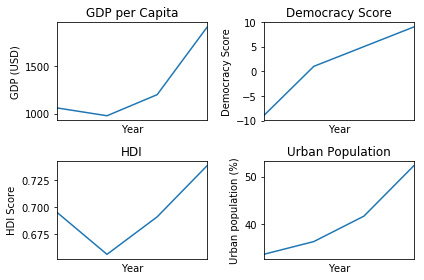

In [20]:
#create a subplot of a random country, Albania, and see how it trends in each of the four 
#indicators over time
plt.subplot(2,2,1)
plt.title('GDP per Capita')
plt.xlabel('Year')
plt.ylabel('GDP (USD)')
plt.xticks([1980, 1990, 2000, 2010],[1980, 1990, 2000, 2010])
GDP.loc['Albania'].plot()

plt.subplot(2,2,2)
plt.title('Democracy Score')
plt.xlabel('Year')
plt.ylabel('Democracy Score')
plt.xticks([1980, 1990, 2000, 2010],[1980, 1990, 2000, 2010])
dem_scores.loc['Albania'].plot()

plt.subplot(2,2,3)
plt.title('HDI')
plt.xlabel('Year')
plt.ylabel('HDI Score')
plt.xticks([1980, 1990, 2000, 2011],[1980, 1990, 2000, 2011])
HDI.loc['Albania'].plot()

plt.subplot(2,2,4)
plt.title('Urban Population')
plt.xlabel('Year')
plt.ylabel('Urban population (%)')
plt.xticks([1980, 1990, 2000, 2010],[1980, 1990, 2000, 2011])
urban_pop.loc['Albania'].plot()

plt.tight_layout()

Text(0.5,1,'GDP - Democracy Score')

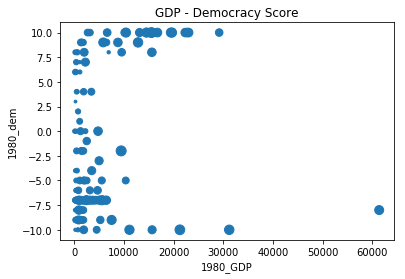

In [16]:
#throw GDP and democracy score for 1980 on a scatter plot and make it's scalar based on
#urban population
dem_GDP_HDI_urb.plot(kind='scatter',x='1980_GDP',y='1980_dem',s=dem_GDP_HDI_urb['1980_urban'])
plt.title('GDP - Democracy Score')

Text(0.5,1,'Democracy Score - Urban Population')

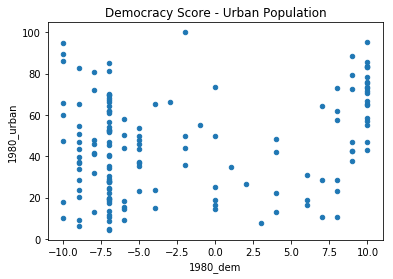

In [17]:
#compare democracy score and urban population on a scatterplot
dem_GDP_HDI_urb.plot(kind='scatter',x='1980_dem',y='1980_urban')
plt.title('Democracy Score - Urban Population')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3cf2202550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3cf1e9d320>]], dtype=object)

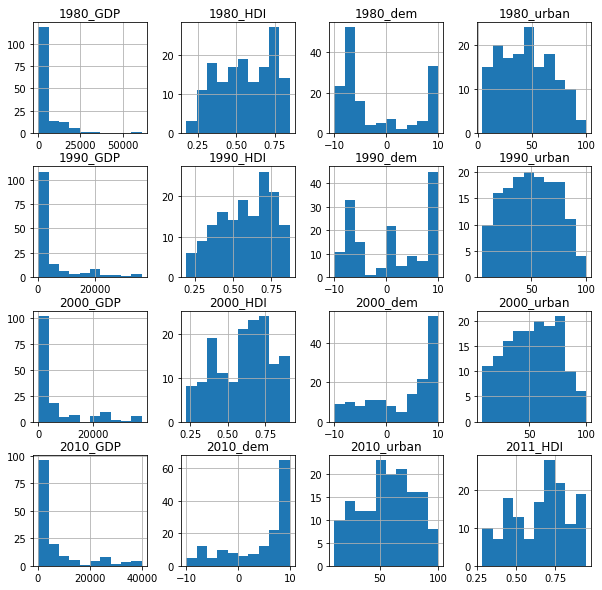

In [18]:
#create a histogram matrix of the entire dataset and see what the distributions for each
#indicator look like for each year.

#this will help us understand any caveats, disclaimers as we examine how indicators compare 
#as we dive into our questions.
dem_GDP_HDI_urb.hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3cf1df93c8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3cee3f54a8>]], dtype=object)

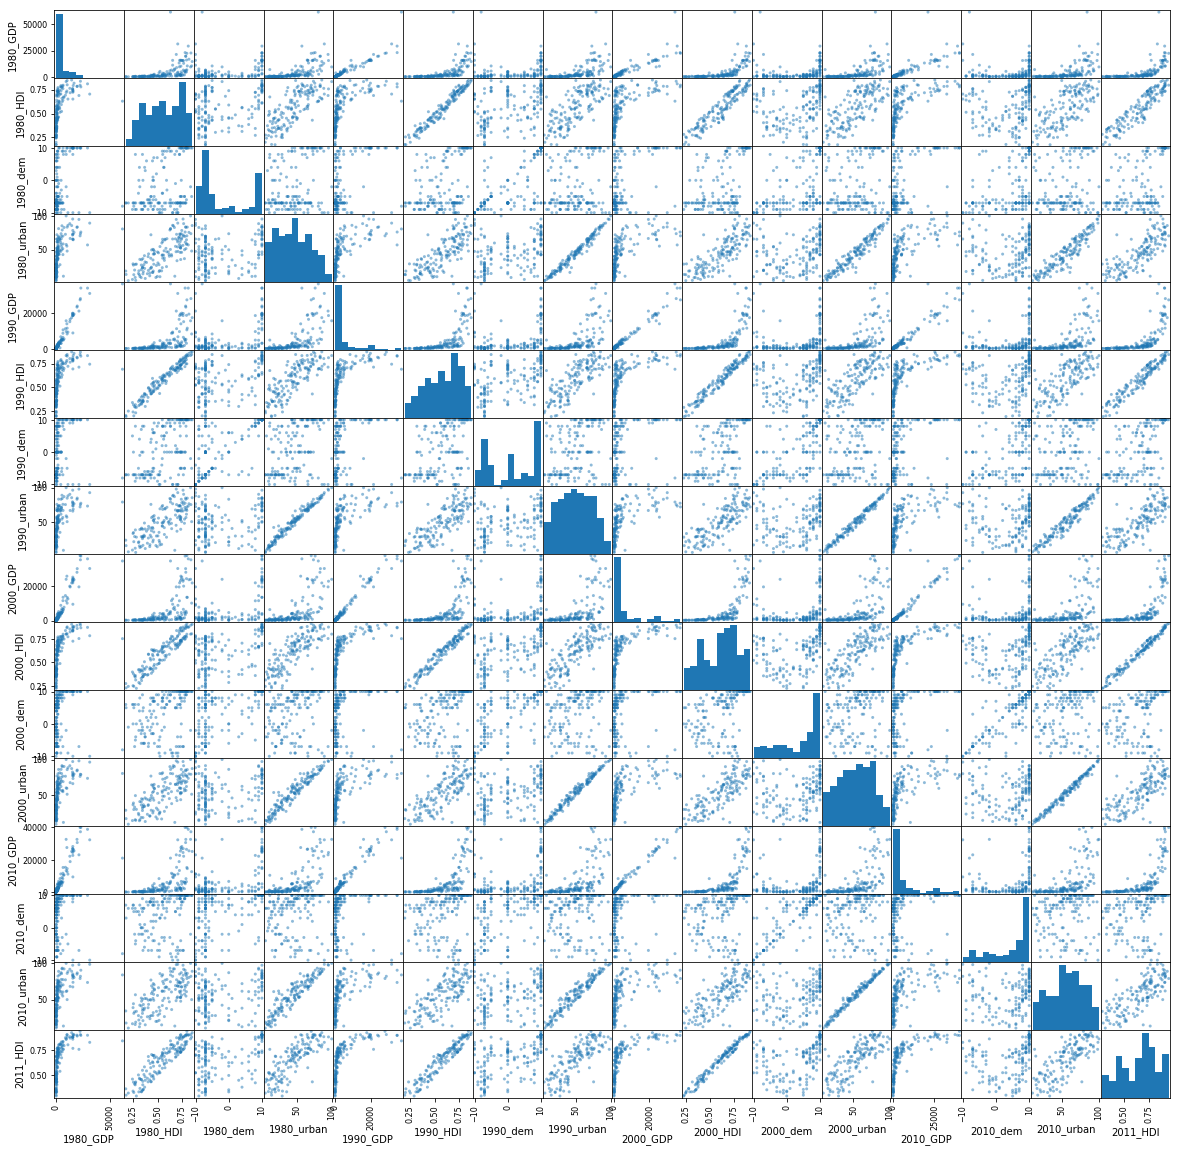

In [19]:
#create a scatter plot matrix for all indicators to have an idea of where there might be some
#trends to investigate in our questions
pd.plotting.scatter_matrix(dem_GDP_HDI_urb,figsize=(20, 20))

In [43]:
#gathering the summary statistics for each year, for each indicator.
dem_GDP_HDI_urb.describe()

,1980_GDP,1980_HDI,1980_dem,1980_urban,1990_GDP,1990_HDI,1990_dem,1990_urban,2000_GDP,2000_HDI,2000_dem,2000_urban,2010_GDP,2010_dem,2010_urban,2011_HDI
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,4693.995688,0.556077,-2.144737,45.272612,5031.557044,0.579950,0.546053,49.903737,5850.073759,0.606849,3.078947,53.036553,6711.633418,4.006579,56.338447,0.653441
std,7829.517338,0.177252,7.195849,23.746813,7973.116772,0.175263,7.113869,23.396905,9294.379544,0.181595,6.447471,23.034922,9892.080372,6.181040,22.775491,0.176529
min,137.241872,0.174000,-10.000000,4.339000,127.888127,0.193000,-10.000000,5.416000,86.754507,0.224000,-10.000000,8.246000,105.531738,-10.000000,10.642000,0.286000
25%,448.408379,0.419500,-7.000000,24.571750,470.295517,0.435000,-7.000000,29.543250,485.002065,0.437500,-2.250000,34.541000,619.726749,-1.250000,38.052000,0.503000
50%,1450.948440,0.561500,-6.000000,44.754500,1426.981162,0.597000,0.000000,50.087000,1499.413247,0.635000,5.500000,53.917000,2219.095418,6.500000,57.394500,0.689500
75%,5129.950999,0.722250,6.000000,64.906500,4904.949712,0.724250,8.000000,68.961500,4932.405446,0.749000,9.000000,71.695500,6617.137066,9.000000,73.692750,0.781500
max,61374.754550,0.850000,10.000000,100.000000,36597.669110,0.873000,10.000000,100.000000,37472.671670,0.913000,10.000000,100.000000,39971.787450,10.000000,100.000000,0.943000


### Question 1: Does there appear to be a relationship between more Democratic countries and GDP, HDI, or Urban Population? That said, do we need to first see if countries are overall becoming more democratic with time?

> Democracy scores have a bi-modal distribution in 1980, with a heavier emphasis on the lower end of democracy scores. But by the time we get to the years 2000 and 2010, democracy scores are more left skewed towards higher democracy scores. So we can say that democracy scores appear to be increasing world-wide over time. This is further investigated using boxplots, in which we can see that the median Democracy Score worldwide is well below 0 in 1980, however, it increases dramatically to well over 0 by 2000 and stays there into 2010. We can rather confidently confirm that overall, more and more countries around the world are adopting a more democratic, free nature in their government.

> There doesn't appear to be much of a relationship between Democratic countries and GDP, HDI or Urban Population over time. With Democracy scores increases over time, we just see more and more countries, on many levels of GDP/HDI/Urban population shifting up on the Democracy score. The correlation coefficients also don't appear to be very strong across the board. Even running the regression on the highest correlation, which was between Democracy Score and HDI for 1990, we don't see much of a trend. The two regression lines don't overlap too much.

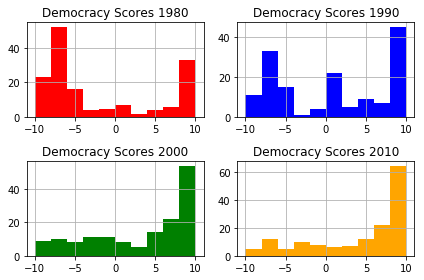

In [41]:
#plot democracy scores across all four decades to see if they are generally rising
plt.subplot(221)
dem_GDP_HDI_urb['1980_dem'].hist(color='red')
plt.title('Democracy Scores 1980')

plt.subplot(222)
dem_GDP_HDI_urb['1990_dem'].hist(color='blue')
plt.title('Democracy Scores 1990')

plt.subplot(223)
dem_GDP_HDI_urb['2000_dem'].hist(color='green')
plt.title('Democracy Scores 2000')

plt.subplot(224)
dem_GDP_HDI_urb['2010_dem'].hist(color='orange')
plt.title('Democracy Scores 2010')

plt.tight_layout()

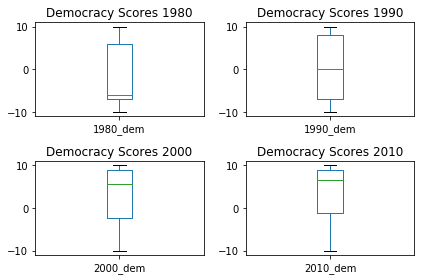

In [42]:
plt.subplot(221)
dem_GDP_HDI_urb['1980_dem'].plot(kind='box');
plt.title('Democracy Scores 1980')

plt.subplot(222)
dem_GDP_HDI_urb['1990_dem'].plot(kind='box');
plt.title('Democracy Scores 1990')

plt.subplot(223)
dem_GDP_HDI_urb['2000_dem'].plot(kind='box');
plt.title('Democracy Scores 2000')

plt.subplot(224)
dem_GDP_HDI_urb['2010_dem'].plot(kind='box');
plt.title('Democracy Scores 2010')

plt.tight_layout()

[[ 1.         0.3469549]
 [ 0.3469549  1.       ]]
[[ 1.          0.37154789]
 [ 0.37154789  1.        ]]
[[ 1.          0.29161892]
 [ 0.29161892  1.        ]]
[[ 1.          0.24637708]
 [ 0.24637708  1.        ]]


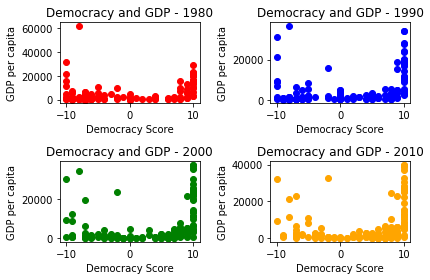

In [29]:
#Compare democracy and GDP for each year
plt.subplot(221)
plt.scatter(x=dem_GDP_HDI_urb['1980_dem'],y=dem_GDP_HDI_urb['1980_GDP'],color='red')
plt.title('Democracy and GDP - 1980')
plt.xlabel('Democracy Score')
plt.ylabel('GDP per capita')
print(np.corrcoef(dem_GDP_HDI_urb['1980_dem'],y=dem_GDP_HDI_urb['1980_GDP']))

plt.subplot(222)
plt.scatter(x=dem_GDP_HDI_urb['1990_dem'],y=dem_GDP_HDI_urb['1990_GDP'],c='blue')
plt.title('Democracy and GDP - 1990')
plt.xlabel('Democracy Score')
plt.ylabel('GDP per capita')
print(np.corrcoef(dem_GDP_HDI_urb['1990_dem'],y=dem_GDP_HDI_urb['1990_GDP']))

plt.subplot(223)
plt.scatter(x=dem_GDP_HDI_urb['2000_dem'],y=dem_GDP_HDI_urb['2000_GDP'],c='green')
plt.title('Democracy and GDP - 2000')
plt.xlabel('Democracy Score')
plt.ylabel('GDP per capita')
print(np.corrcoef(dem_GDP_HDI_urb['2000_dem'],y=dem_GDP_HDI_urb['2000_GDP']))

plt.subplot(224)
plt.scatter(x=dem_GDP_HDI_urb['2010_dem'],y=dem_GDP_HDI_urb['2010_GDP'],c='orange')
plt.title('Democracy and GDP - 2010')
plt.xlabel('Democracy Score')
plt.ylabel('GDP per capita')
print(np.corrcoef(dem_GDP_HDI_urb['2010_dem'],y=dem_GDP_HDI_urb['2010_GDP']))

plt.tight_layout()

[[ 1.         0.3324615]
 [ 0.3324615  1.       ]]
[[ 1.          0.50508574]
 [ 0.50508574  1.        ]]
[[ 1.          0.39278143]
 [ 0.39278143  1.        ]]
[[ 1.          0.27809709]
 [ 0.27809709  1.        ]]


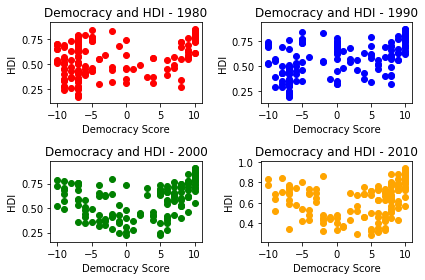

In [30]:
#Compare democracy and HDI for each year
plt.subplot(221)
plt.scatter(x=dem_GDP_HDI_urb['1980_dem'],y=dem_GDP_HDI_urb['1980_HDI'],c='red')
plt.title('Democracy and HDI - 1980')
plt.xlabel('Democracy Score')
plt.ylabel('HDI')
print(np.corrcoef(dem_GDP_HDI_urb['1980_dem'],y=dem_GDP_HDI_urb['1980_HDI']))

plt.subplot(222)
plt.scatter(x=dem_GDP_HDI_urb['1990_dem'],y=dem_GDP_HDI_urb['1990_HDI'],c='blue')
plt.title('Democracy and HDI - 1990')
plt.xlabel('Democracy Score')
plt.ylabel('HDI')
print(np.corrcoef(dem_GDP_HDI_urb['1990_dem'],y=dem_GDP_HDI_urb['1990_HDI']))

plt.subplot(223)
plt.scatter(x=dem_GDP_HDI_urb['2000_dem'],y=dem_GDP_HDI_urb['2000_HDI'],c='green')
plt.title('Democracy and HDI - 2000')
plt.xlabel('Democracy Score')
plt.ylabel('HDI')
print(np.corrcoef(dem_GDP_HDI_urb['2000_dem'],y=dem_GDP_HDI_urb['2000_HDI']))

plt.subplot(224)
plt.scatter(x=dem_GDP_HDI_urb['2010_dem'],y=dem_GDP_HDI_urb['2011_HDI'],c='orange')
plt.title('Democracy and HDI - 2010')
plt.xlabel('Democracy Score')
plt.ylabel('HDI')
print(np.corrcoef(dem_GDP_HDI_urb['2010_dem'],y=dem_GDP_HDI_urb['2011_HDI']))

plt.tight_layout()

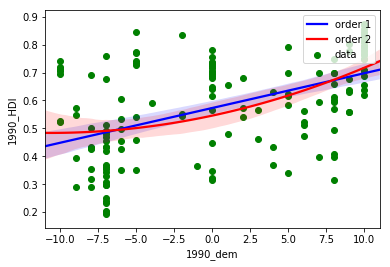

In [31]:
#run a linear regression on democracy score and HDI for 1990, referenced in blue scatter plot above
plt.scatter(x=dem_GDP_HDI_urb['1990_dem'],y=dem_GDP_HDI_urb['1990_HDI'],c='green',label='data')
sns.regplot(x='1990_dem',y='1990_HDI', data = dem_GDP_HDI_urb,scatter=None, order=1, color='blue', label='order 1')
sns.regplot(x='1990_dem',y='1990_HDI', data = dem_GDP_HDI_urb,scatter=None, order=2, color='red', label='order 2')
plt.legend(loc='upper right')

[[ 1.          0.25873787]
 [ 0.25873787  1.        ]]
[[ 1.          0.36528223]
 [ 0.36528223  1.        ]]
[[ 1.          0.23225287]
 [ 0.23225287  1.        ]]
[[ 1.          0.13159651]
 [ 0.13159651  1.        ]]


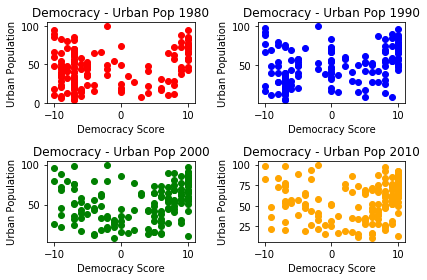

In [32]:
#Compare democracy and Urban Population for each year
plt.subplot(221)
plt.scatter(x=dem_GDP_HDI_urb['1980_dem'],y=dem_GDP_HDI_urb['1980_urban'],c='red')
plt.title('Democracy - Urban Pop 1980')
plt.xlabel('Democracy Score')
plt.ylabel('Urban Population')
print(np.corrcoef(dem_GDP_HDI_urb['1980_dem'],y=dem_GDP_HDI_urb['1980_urban']))

plt.subplot(222)
plt.scatter(x=dem_GDP_HDI_urb['1990_dem'],y=dem_GDP_HDI_urb['1990_urban'],c='blue')
plt.title('Democracy - Urban Pop 1990')
plt.xlabel('Democracy Score')
plt.ylabel('Urban Population')
print(np.corrcoef(dem_GDP_HDI_urb['1990_dem'],y=dem_GDP_HDI_urb['1990_urban']))

plt.subplot(223)
plt.scatter(x=dem_GDP_HDI_urb['2000_dem'],y=dem_GDP_HDI_urb['2000_urban'],c='green')
plt.title('Democracy - Urban Pop 2000')
plt.xlabel('Democracy Score')
plt.ylabel('Urban Population')
print(np.corrcoef(dem_GDP_HDI_urb['2000_dem'],y=dem_GDP_HDI_urb['2000_urban']))

plt.subplot(224)
plt.scatter(x=dem_GDP_HDI_urb['2010_dem'],y=dem_GDP_HDI_urb['2010_urban'],c='orange')
plt.title('Democracy - Urban Pop 2010')
plt.xlabel('Democracy Score')
plt.ylabel('Urban Population')
print(np.corrcoef(dem_GDP_HDI_urb['2010_dem'],y=dem_GDP_HDI_urb['2010_urban']))

plt.tight_layout()

### Do urban population trends seem to correlate with HDI score?

> Population trends do seem to correlate somewhat strongly, in the positive direction, with HDI score over time. So as urban populations rise, so do HDI scores. This is also backed up by running a correlation coefficient for each scatter plot, where the results range from .75 to .78, which indicates a positive, strong correlation. We've also run a linear regression on HDI and urban population from the year 2000, where order 1 and order 2 overlap nicely for the most part. However it is important to note that we don't know which factor rises first (urban population or HDI) and this in no way indicates causality.

[[ 1.          0.76400545]
 [ 0.76400545  1.        ]]
[[ 1.          0.78529686]
 [ 0.78529686  1.        ]]
[[ 1.          0.78286815]
 [ 0.78286815  1.        ]]
[[ 1.          0.75159404]
 [ 0.75159404  1.        ]]


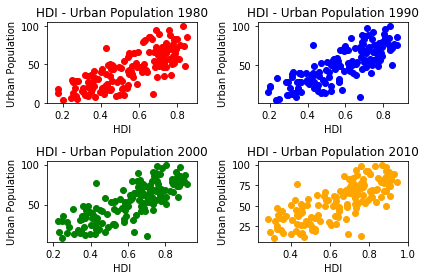

In [33]:
#compare HDI and Urban population over time
plt.subplot(221)
plt.scatter(x=dem_GDP_HDI_urb['1980_HDI'],y=dem_GDP_HDI_urb['1980_urban'],c='red')
plt.title('HDI - Urban Population 1980')
plt.xlabel('HDI')
plt.ylabel('Urban Population')
print(np.corrcoef(dem_GDP_HDI_urb['1980_HDI'],y=dem_GDP_HDI_urb['1980_urban']))

plt.subplot(222)
plt.scatter(x=dem_GDP_HDI_urb['1990_HDI'],y=dem_GDP_HDI_urb['1990_urban'],c='blue')
plt.title('HDI - Urban Population 1990')
plt.xlabel('HDI')
plt.ylabel('Urban Population')
print(np.corrcoef(dem_GDP_HDI_urb['1990_HDI'],y=dem_GDP_HDI_urb['1990_urban']))

plt.subplot(223)
plt.scatter(x=dem_GDP_HDI_urb['2000_HDI'],y=dem_GDP_HDI_urb['2000_urban'],c='green')
plt.title('HDI - Urban Population 2000')
plt.xlabel('HDI')
plt.ylabel('Urban Population')
print(np.corrcoef(dem_GDP_HDI_urb['2000_HDI'],y=dem_GDP_HDI_urb['2000_urban']))

plt.subplot(224)
plt.scatter(x=dem_GDP_HDI_urb['2011_HDI'],y=dem_GDP_HDI_urb['2010_urban'],c='orange')
plt.title('HDI - Urban Population 2010')
plt.xlabel('HDI')
plt.ylabel('Urban Population')
print(np.corrcoef(dem_GDP_HDI_urb['2011_HDI'],y=dem_GDP_HDI_urb['2010_urban']))

plt.tight_layout()

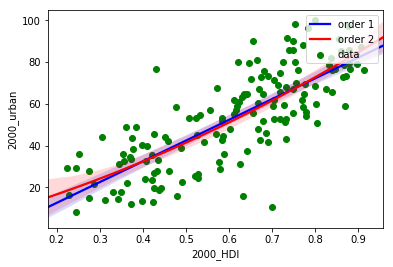

In [34]:
#run linear regression on Urban Population and HDI for 2000, referenced in green scatter plot above
plt.scatter(x=dem_GDP_HDI_urb['2000_HDI'],y=dem_GDP_HDI_urb['2000_urban'],c='green',label='data')
sns.regplot(x='2000_HDI',y='2000_urban', data = dem_GDP_HDI_urb,scatter=None, order=1, color='blue', label='order 1')
sns.regplot(x='2000_HDI',y='2000_urban', data = dem_GDP_HDI_urb,scatter=None, order=2, color='red', label='order 2')
plt.legend(loc='upper right')

### Do GDP trends seem to correlate with HDI score?

> Over time, the data seem to grow in positive correlation strength. We can say that with between at .52 and .68 correlation, as GDP increases, so does HDI score. However, the regression we run GDP and HDI for 2010 (which has a correlation coefficient of .7) throws us in for a loop on account of the curvature of the data. 

[[ 1.          0.52223597]
 [ 0.52223597  1.        ]]
[[ 1.          0.63444332]
 [ 0.63444332  1.        ]]
[[ 1.          0.68360887]
 [ 0.68360887  1.        ]]
[[ 1.         0.6988298]
 [ 0.6988298  1.       ]]


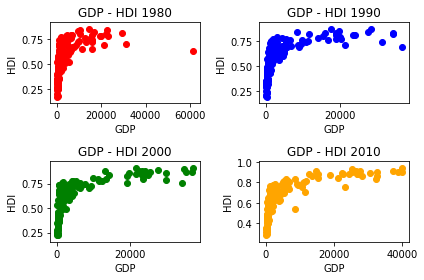

In [35]:
#compare GDP and HDI over time
plt.subplot(221)
plt.scatter(x=dem_GDP_HDI_urb['1980_GDP'],y=dem_GDP_HDI_urb['1980_HDI'],c='red')
plt.title('GDP - HDI 1980')
plt.xlabel('GDP')
plt.ylabel('HDI')
print(np.corrcoef(dem_GDP_HDI_urb['1980_GDP'],y=dem_GDP_HDI_urb['1980_HDI']))

plt.subplot(222)
plt.scatter(x=dem_GDP_HDI_urb['1990_GDP'],y=dem_GDP_HDI_urb['1990_HDI'],c='blue')
plt.title('GDP - HDI 1990')
plt.xlabel('GDP')
plt.ylabel('HDI')
print(np.corrcoef(dem_GDP_HDI_urb['1990_GDP'],y=dem_GDP_HDI_urb['1990_HDI']))

plt.subplot(223)
plt.scatter(x=dem_GDP_HDI_urb['2000_GDP'],y=dem_GDP_HDI_urb['2000_HDI'],c='green')
plt.title('GDP - HDI 2000')
plt.xlabel('GDP')
plt.ylabel('HDI')
print(np.corrcoef(dem_GDP_HDI_urb['2000_GDP'],y=dem_GDP_HDI_urb['2000_HDI']))

plt.subplot(224)
plt.scatter(x=dem_GDP_HDI_urb['2010_GDP'],y=dem_GDP_HDI_urb['2011_HDI'],c='orange')
plt.title('GDP - HDI 2010')
plt.xlabel('GDP')
plt.ylabel('HDI')
print(np.corrcoef(dem_GDP_HDI_urb['2010_GDP'],y=dem_GDP_HDI_urb['2011_HDI']))

plt.tight_layout()

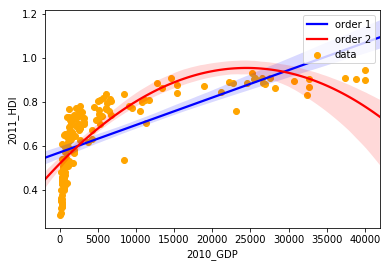

In [36]:
#run linear regression on GDP and HDI for 2010, referenced in orange scatter plot above
plt.scatter(x=dem_GDP_HDI_urb['2010_GDP'],y=dem_GDP_HDI_urb['2011_HDI'],c='orange',label='data')
sns.regplot(x='2010_GDP',y='2011_HDI', data = dem_GDP_HDI_urb,scatter=None, order=1, color='blue', label='order 1')
sns.regplot(x='2010_GDP',y='2011_HDI', data = dem_GDP_HDI_urb,scatter=None, order=2, color='red', label='order 2')
plt.legend(loc='upper right')

<a id='conclusions'></a>
## Conclusions

> **Findings**: After diving into a few questions about what's going on in the world in terms of democracy scores, urban populations as a percentage of total populations, GDP per capita, and Human Development Index scores, we found some interesting insights. 

> The strongest case we can make is that both urban populations and human development are increasing on a per country basis at a similar rate. We cannot say that one factor is causing the other, we can only say that there is an association between them in terms of their rate of growth. It's very interesting though to see that as our urban populations rise, so does our aggregate human development in terms of life expectancy, education, and standard of living (and/or vice versa)! There are definitely further, more granular and in depth tests to run on this finding to gather more insights. I am definitely left with more questions. For example, it is no secret that simple laws of supply and demand lead one to believe that as more and more people move to urban/metropolitan areas, the increased demand for housing pushing the prices of housing up. And average salaries for similar work are higher in those same areas. It would be interesting to investigate the economical context of this finding, as well as try to identify whether urban population rise leads to HDI rise, or vice versa.

> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0